In [23]:
# Imports
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Downloading Emali phishing data from kaggle
path = kagglehub.dataset_download("ethancratchley/email-phishing-dataset")
print("Path to dataset files:", path)

d:\ML-public\virtualenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.18M/3.18M [00:00<00:00, 3.98MB/s]

Extracting files...


Path to dataset files: C:\Users\freen\.cache\kagglehub\datasets\ethancratchley\email-phishing-dataset\versions\1


In [ ]:
# Finding path to downloaded data
dataset_path = r"C:\Users\freen\.cache\kagglehub\datasets\ethancratchley\email-phishing-dataset\versions\1"
files = os.listdir(dataset_path)
print("Pliki:", files)

Pliki: ['email_phishing_data.csv']


In [5]:
# Loading kaggle data as a DataFrame
file_path = os.path.join(dataset_path, 'email_phishing_data.csv')
phishing_df = pd.read_csv(file_path)
phishing_df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


In [ ]:
# Splitting data into a feature and target set

# We are taking 5 observations
X = phishing_df[['num_links', 'num_spelling_errors', 'num_unique_domains', 'num_email_addresses', 'num_urgent_keywords']].values
y = phishing_df['label'].values
print(X.shape, y.shape)

(524846, 5) (524846,)


In [ ]:
# Creating KNN Classifier Train / test splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Calculating model accuracy
print(knn.score(X_test, y_test))

0.9867961436356015


In [21]:
# Model complexity analysis (over / underfitting)

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

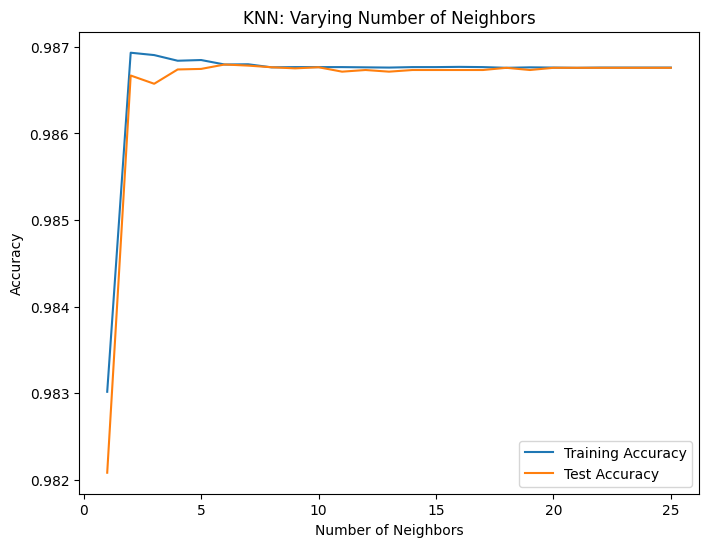

In [24]:
# Analysis results plot for neighbors from 1 to 25

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

#### Analyze of the chart
We can perceive that model achieves the best Test Accuracy about 18 number of Neighbors. In this case we avoid overerfitting (undertrained model with k between 1 and 5) and underfitting (with very large amount of k > 18). It basicly means that model achieves the best predicting accuracy for unknown data with a number of neighbors equal 18.